# **Calculating Planck's Constant**

## **Aim**
- Determination of Material Constant $\eta$ **[V-I characterstics]**.
- Determination of Barrier Voltage $V_0$ **[T-I characterstics]**
- Calculating _**Planck's Constant**_ ($h$).

In [1]:
# IMPORTING REQUIRED LIBRARIES
import numpy as np
import scipy.optimize as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Markdown
mpl.style.use("fivethirtyeight")

## **Reading the CSV Table**

In [2]:

VI = pd.read_csv("VI.csv", "\t")
TI = pd.read_csv("TI.csv", "\t")

VI["ln(I)"] = (VI[VI.columns[1]]*10**(-6)).apply(np.log) ## ADDS A NEW COLUMN HAVING ENTERIES Log(I(in A)). 
TI["ln(I)"] = (TI[TI.columns[1]]*10**(-3)).apply(np.log) ## ADDS A NEW COLUMN HAVING ENTERIES Log(I(in A))

display(Markdown("**T-I Values**"))
display(TI)
display(Markdown("**V-I Values**"))
display(VI)

**T-I Values**

,Temp(C),current(mA),ln(I)
0,23,0.91,-7.002066
1,24,0.93,-6.980326
2,25,0.95,-6.959049
3,26,0.97,-6.938214
4,27,1.00,-6.907755
5,28,1.02,-6.887953
6,29,1.04,-6.868535
7,30,1.06,-6.849486
8,31,1.08,-6.830794
9,32,1.10,-6.812445


**V-I Values**

,voltage(V),current(\mu A),ln(I)
0,0.10,5,-12.206073
1,0.20,5,-12.206073
2,0.30,5,-12.206073
3,0.40,5,-12.206073
4,0.50,5,-12.206073
5,0.60,5,-12.206073
6,0.70,5,-12.206073
7,0.80,5,-12.206073
8,0.90,5,-12.206073
9,1.00,5,-12.206073


In [3]:
deg2kel = lambda x: x + 273.15

## **Plotting $\log _e (I)$ v/s Voltage graph**

Text(0, 0.5, '$\\log_e (I)$')

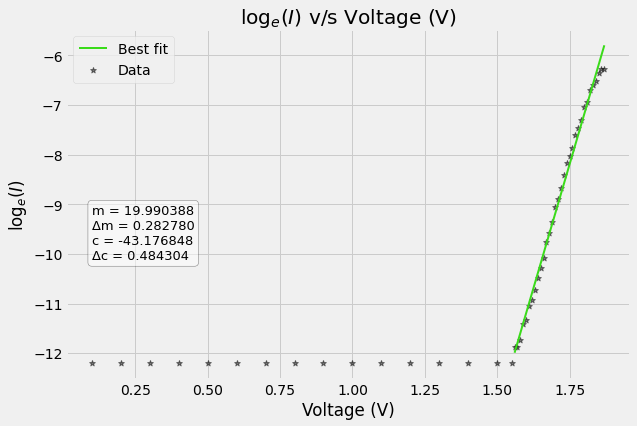

In [4]:
plt.figure(figsize = (9, 6))
plt.scatter(VI[VI.columns[0]], (VI[VI.columns[1]]*10**(-6)).apply(np.log),
            marker = "*", color = "black", alpha=0.5, linewidths=1, label = "Data")

# FINDING THE FEST FIT CURVE
def f(x, m, c):
    return m*x + c


x = np.linspace(1.56, 1.87, 1000)
args2, _2 = sp.curve_fit(f, VI[VI.columns[0]][15:],
                         (VI[VI.columns[1]]*10**(-6)).apply(np.log)[15:])  ## curve fitting

m = args2[0]

Δm, Δc = np.sqrt(np.diag(_2))  ## Standard deviation
#########################

plt.plot(x, f(x, *args2), linewidth = 2, label = "Best fit", color = "#3adb1a")
plt.legend()


### TEXT BOX
text = "\n".join(["m = {:.6f}".format(m), "Δm = {:.6f}".format(Δm),
                  "c = {:.6f}".format(args2[1]), "Δc = {:.6f}".format(Δc)])

props = dict(boxstyle='round', facecolor='white',alpha = 0.5, edgecolor = "black")

plt.text(0.1, -9, text, fontsize=13, 
         verticalalignment='top', bbox = props)
##########################

plt.title(r"$\log_e (I)$" + " v/s Voltage (V)")
plt.xlabel("Voltage (V)")
plt.ylabel(r"$\log_e (I)$")

### **Calculating Material Constant $\eta$**

In [5]:
kb = 1.38064852e-23    ## Boltzmann constant in SI 
e = 1.60217662e-19     ## Electronic charge in SI
T = 293.15             ## Room temperature in Kelvins

eta = (e/(kb*T)) * m**-1 ## Calculating Material Constant
Δeta = (Δm*eta)/m          ## Calculating error in Material Constant

display(Markdown("**The value of material constant is**"))
display(Markdown("""$\eta : {}$ 

$\Delta \eta:  {}$ """.format(eta,  Δeta)))

**The value of material constant is**

$\eta : 1.980232250580144$ 

$\Delta \eta:  0.028012010471781795$ 

## **Plotting $\log _ e(I)$ v/s $1/T$**  

Text(0.003025, -6.8, 'm = -1899.588905\nΔm = 8.067465\nc = -0.584360\nΔc = 0.025764')

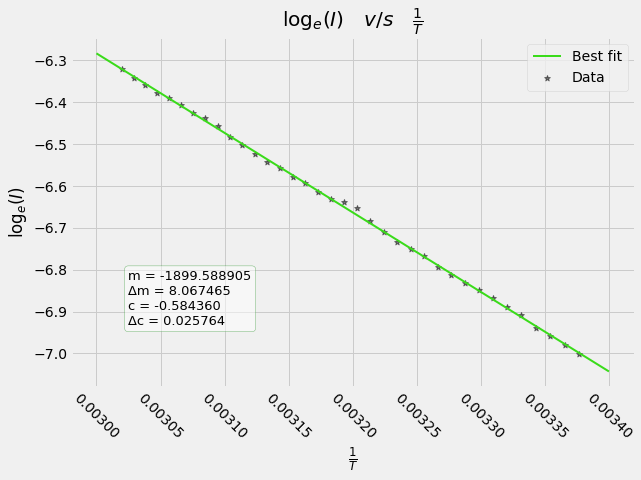

In [6]:
plt.figure(figsize = (9, 6))
plt.scatter(1/((TI["Temp(C)"]).apply(deg2kel)), (TI["current(mA)"]*10**(-3)).apply(np.log),
            marker = "*", color = "black", alpha=0.5, linewidths=1, label = "Data")

plt.title(r"$\log_e (I) \quad v/s \quad \frac{1}{T}$")
plt.grid([4, 5])
plt.xticks(rotation = -45)
plt.xlabel(r"$\frac{1}{T}$")
plt.ylabel(r"$\log_e (I)$")

# FINDING THE FEST FIT CURVE
def f(x, m, c):
    return m*x + c


x = np.linspace(0.003, 0.0034, 1000)
args1, _1 = sp.curve_fit(f, 1/((TI["Temp(C)"]).apply(deg2kel)),
                         (TI["current(mA)"]*10**(-3)).apply(np.log))  ## curve fitting

m = args1[0]

Δm, Δc = np.sqrt(np.diag(_1))  ## Standard deviation
#########################

plt.plot(x, f(x, *args1), linewidth=2, label = "Best fit", color = "#3adb1a")
plt.legend()


### TEXT BOX
text = "\n".join(["m = {:.6f}".format(m), "Δm = {:.6f}".format(Δm),
                  "c = {:.6f}".format(args1[1]), "Δc = {:.6f}".format(Δc)])

props = dict(boxstyle='round', facecolor='white',alpha = 0.5, edgecolor = "green")

plt.text(0.003025, -6.8, text, fontsize=13, 
        verticalalignment='top', bbox = props)
##########################

### **Calculating the barrier Voltage $V_0$**

In [7]:
V = 1.8                ## Voltage
V0 = V - ((eta*kb*m)/e)  ## Calculating Barrier Voltage  
 
ΔV0 = np.sqrt(((eta*kb*Δm)/e)**2 + ((Δeta*kb*m)/e)**2)
#V0*np.sqrt((Δm/m)**2 + (Δeta/eta)**2)


display(Markdown("**The value of Barrier Voltage is**"))
display(Markdown("""$V_0 : {}$ $V$ 

$\Delta V_0:  {}$ $V$""".format(V0,  ΔV0)))

**The value of Barrier Voltage is**

$V_0 : 2.1241518430521684$ $V$ 

$\Delta V_0:  0.004787590534576771$ $V$

## **Calculating Planck's Constant ($h$)**

In [8]:
c = 3e8                ## Speed of light
lambda_ = 580e-9             ## Wavelength of Yellow light

h = (e*V0*lambda_) / c       ## Calculating Planck's Constant

Δh = h*(ΔV0/V0)  ## ERROR IN PLANCK'S CONSTSNT

display(Markdown("**The value of Planck's Constant is**"))
display(Markdown("""$h : {}$ $J s$

$\Delta h:  {}$  $J s$""".format(h, Δh)))

**The value of Planck's Constant is**

$h : 6.579648412518314e-34$ $J s$

$\Delta h:  1.4829760199888928e-36$  $J s$